[![Open notebook in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/afondiel/computer-science-notebook/blob/master/core/ai-ml/computer-audition/lab/examples/audio-processing-AssemblyAI/notebooks/audio_processing_top_8_python_libs_AssemblyAI.ipynb)

## **Top 8 Libraries For Audio Processing In Python**

In [ ]:
# Uncomment to install
# !apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg

In [ ]:
_SAMPLE_DIR = '_assets'
SAMPLE_WAV_SPEECH_PATH = "/content/_assets/speech_3sec.wav"

In [ ]:
# %cd /content

In [ ]:
# !echo $_SAMPLE_DIR
print(SAMPLE_WAV_SPEECH_PATH)

/content/_assets/speech_3sec.wav


### 1. IPython.display

In [ ]:
import os
from IPython.display import Audio, display
# display(Audio(filename=SAMPLE_WAV_SPEECH_PATH, autoplay=True))
display(Audio(SAMPLE_WAV_SPEECH_PATH))

### 2. SoundFile

In [ ]:
# Uncomment to install
# !pip install -q soundfile

In [ ]:
# 2. SoundFile: read & write WAV, FLAC, OGG and MAT
import soundfile as sf
data, samplerate = sf.read(SAMPLE_WAV_SPEECH_PATH)
print(data, samplerate)
sf.write('_assets/new_file.flac', data, samplerate)

[0.01831055 0.01803589 0.01797485 ... 0.00183105 0.00189209 0.00320435] 16000


### 3. wave module Python

In [ ]:
# 3. Wave: Read/Write wave files
import wave # Bult-in module no installation neeeded

# Read
with wave.open(SAMPLE_WAV_SPEECH_PATH, 'rb') as wave_file:
    print(wave_file.getnchannels())
    print(wave_file.getsampwidth())
    print(wave_file.getframerate())
    print(wave_file.getnframes())
    print(wave_file.getparams())
    frames = wave_file.readframes(wave_file.getnframes())
    print(len(frames))

# Write
sample_rate = 16000.0 # hertz
with wave.open('_assets/new_file.wav', 'wb') as wave_file:
    wave_file.setnchannels(1)
    wave_file.setsampwidth(2)
    wave_file.setframerate(sample_rate)
    wave_file.writeframes(frames)

1
2
16000
54400
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=54400, comptype='NONE', compname='not compressed')
108800


In [ ]:
display(Audio(filename='_assets/new_file.wav'))

### 4. PyAudio

In [ ]:
# Uncomment to install
# !pip install -q pyaudio

In [ ]:
# 4. PyAudio: I/O Library for Record microphone
## Python bindings for PortAudio, the crossplatform audio I/O library
## Dependices: # !apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg
## /!\ THE CODE MUST RUN LOCALLY to detect an input audio device
import pyaudio
import wave

CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
RECORD_SECONDS = 5
WAVE_OUTPUT_FILENAME = "_assets/file.wav"

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)

print("recording stopped")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))

### 5. SoundDevice

In [ ]:
# Uncomment to install
# !pip install -q sounddevice

In [ ]:
# 5. Record Microphone , Play audio
## /!\ THE CODE MUST RUN LOCALLY to detect an input audio device
import sounddevice as sd
from scipy.io.wavfile import write

fs = 44100  # Sample rate
seconds = 3  # Duration of recording

myrecording = sd.rec(int(seconds * fs), samplerate=fs, channels=2)
sd.wait()  # Wait until recording is finished
write('output.wav', fs, myrecording)

### 6. PyDub

In [ ]:
# Uncomment to install
# !pip install -q pydub

In [ ]:
# 6. PyDub: Manipulating Audio, mp3 and other formats

from pydub import AudioSegment
from pydub.playback import play

audio = AudioSegment.from_wav(SAMPLE_WAV_SPEECH_PATH)
# play(audio)

# Boost the volume by 6dB
audio = audio + 6

# Repeat the clip twice
audio = audio*2

# 2s fade in
audio = audio.fade_in(2000)

audio.export("_assets/new_file.wav", format="wav")

display(Audio(filename='_assets/new_file.wav'))


### 7.Librosa

In [ ]:
# !pip install -q librosa

In [ ]:
# 7. Librosa: music and audio analysis
import librosa
import numpy as np

# data, sr = librosa.load(SAMPLE_WAV_SPEECH_PATH)
data, sr = librosa.load(SAMPLE_WAV_SPEECH_PATH, sr=16000)
# display(Audio(filename=SAMPLE_WAV_SPEECH_PATH))
print(data.shape, sr)

(54400,) 16000


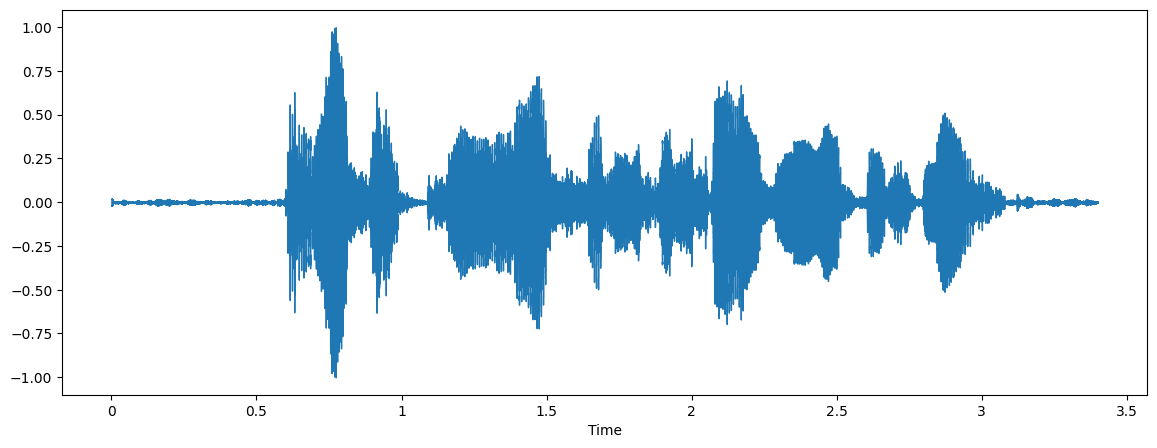

In [ ]:
# Waveform (time vs amplitude)

import librosa.display
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
librosa.display.waveshow(data, sr=sr)

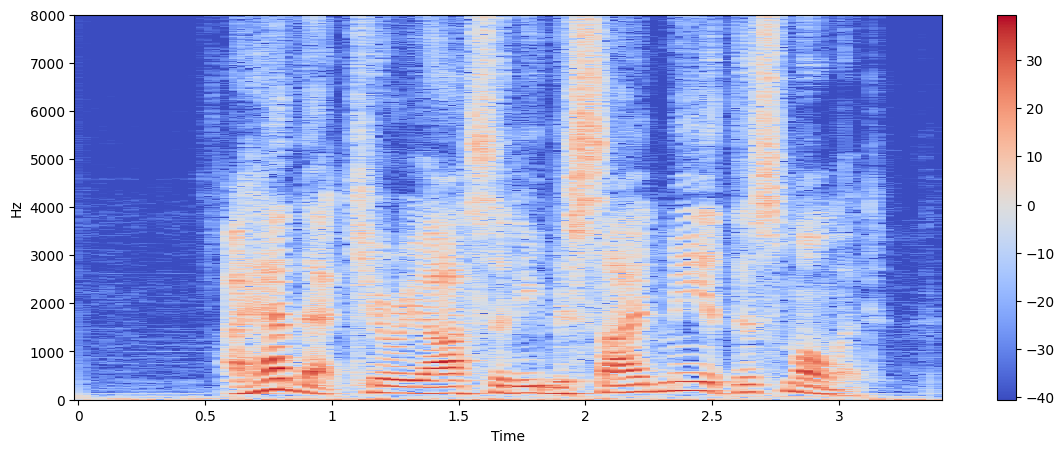

In [ ]:
# Spectogram
x = librosa.stft(data)
xdb = librosa.amplitude_to_db(abs(x))

plt.figure(figsize=(14, 5))
librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

(107,)
range(0, 107)


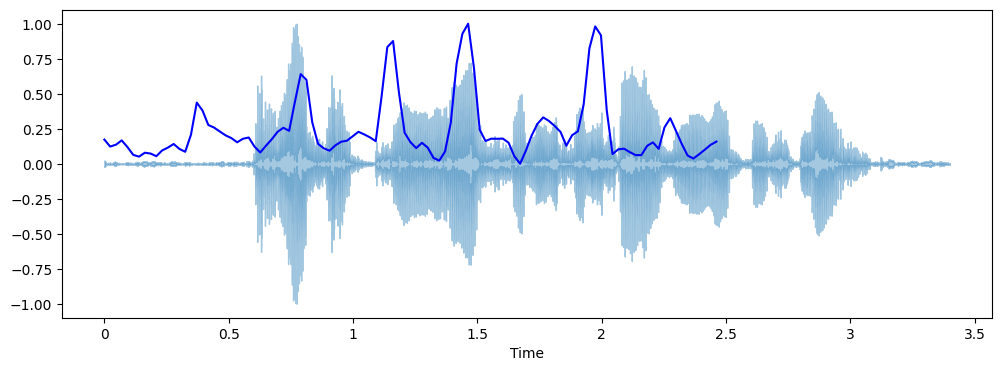

In [ ]:
# Features Analysis e.g., Spectral Centroid
import sklearn

spectral_centroids = librosa.feature.spectral_centroid(y=data, sr=sr)[0]
print(spectral_centroids.shape)

# Computing the time variable for visualisation
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
print(frames)
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveshow(data, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')


### 8. Torchaudio

In [ ]:
# !pip install -q torch torchaudio

In [ ]:
# !apt-get update
# !apt-get install -y sox libsox-dev libsox-fmt-all

In [ ]:
# 8. TorchAudio: TorchAudio is a library for audio and signal processing with PyTorch
# It provides I/O, signal and dta processing functions,
# datasets, model implementations and applications components

import torch
import torchaudio

waveform, sample_rate = torchaudio.load(SAMPLE_WAV_SPEECH_PATH)
print(waveform)
print(waveform.shape, sample_rate)

tensor([[0.0183, 0.0180, 0.0180,  ..., 0.0018, 0.0019, 0.0032]])
torch.Size([1, 54400]) 16000


In [58]:
# Resampling
import torchaudio.transforms as T
import torchaudio.functional as F

waveform, sample_rate = torchaudio.load(SAMPLE_WAV_SPEECH_PATH)
resample_rate = 32000

resampled_wf1 = F.resample(waveform, sample_rate, resample_rate, lowpass_filter_width=12)
resampled_wf2 = F.resample(waveform, sample_rate, resample_rate, resampling_method="sinc_interp_kaiser")

print(resampled_wf1.shape, resampled_wf2.shape)

torch.Size([1, 108800]) torch.Size([1, 108800])


In [ ]:
# Apply effects to file
def _plot(wf, sr, title):
  wf = wf.numpy()

  num_channels, num_frames = wf.shape
  time_axis = torch.arange(0, num_frames) / sr

  figure, axes = plt.subplots(num_channels, 1)
  if num_channels == 1:
    axes = [axes]
  for c in range(num_channels):
    if title == "waveform":
      axes[c].plot(time_axis, wf[c], linewidth=1)
      axes[c].grid(True)
    else:
      axes[c].specgram(wf[c], Fs=sr)
    if num_channels > 1:
      axes[c].set_ylabel(f'Channel {c+1}')
  figure.suptitle(title)
  plt.show(block=False)

def get_sample(path, resample=16000):
  effects = [["remix", "1"]]
  if resample:
    effects.extend([
        ["lowpass", f"{resample // 2}"],
        ["rate", f'{resample}'],
    ])
  wf, sr = torchaudio.sox_effects.apply_effects_file(path, effects=effects)
  return wf, sr

/content/_assets/speech_3sec.wav


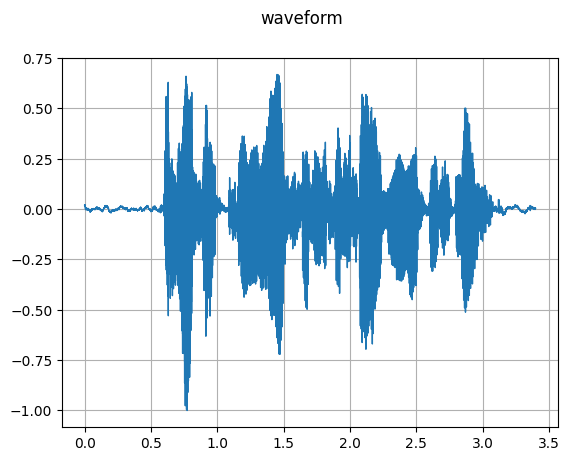

torch.Size([1, 54400]) 16000


In [ ]:
print(SAMPLE_WAV_SPEECH_PATH)
wf1, sr1 = get_sample(SAMPLE_WAV_SPEECH_PATH, resample=16000)
_plot(wf1, sr1, "waveform")
print(wf1.shape, sr1)

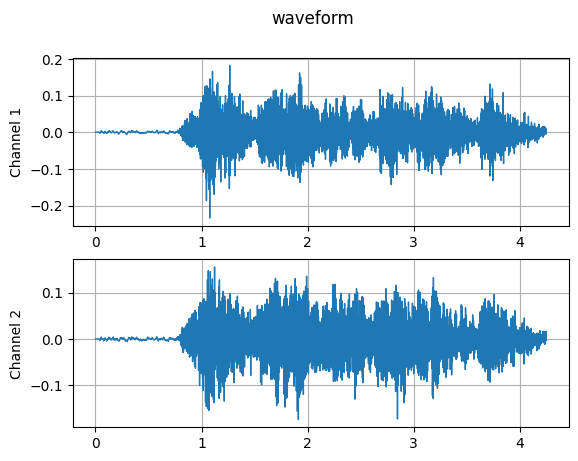

In [ ]:
# Apply effects to tensor
effects = [
    ["lowpass", "-1", "300"], # apply single-pole lowpass filter
    ["speed", "0.8"], # reduce speed
                      # This only changes sample rate (sr), so it is necessary to
                      # add 'rate' effect with original sample rate after this.
   ["rate", f"{sr}"],
   ["reverb", "-w" ], # Reverbation gives some dramatic feeling
]

wf2, sr2 = torchaudio.sox_effects.apply_effects_tensor(wf1, sr1, effects)
_plot(wf2, sr2, "waveform")
# print(wf2.shape, sr2)

## References
- Tutorials by  AssemblyAI:
  - [Top 8 Libraries For Audio Processing In Python
  ](https://www.youtube.com/watch?v=I7hlBmn83TY&list=PLcWfeUsAys2nb0i79L_LqYVfwOWEYA4eD)
  - [Python Speech Recognition Project Series](https://www.youtube.com/watch?v=I7hlBmn83TY&list=PLcWfeUsAys2nb0i79L_LqYVfwOWEYA4eD)
- [Audio Features Extraction with PyTorch](https://docs.pytorch.org/audio/stable/tutorials/audio_feature_extractions_tutorial.html#sphx-glr-tutorials-audio-feature-extractions-tutorial-py)